# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.preprocessing import LabelEncoder , MinMaxScaler

# Exploring Dataset

In [ ]:
data = pd.read_csv('Titanic-Dataset.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
data.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [ ]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [ ]:
data.drop('Cabin' , inplace = True ,axis=1)

In [ ]:
data['Embarked'] = data['Embarked'].fillna('S')

In [ ]:
data.isna().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(891, 11)

# Handling Categorical Features

In [ ]:
Sex = pd.get_dummies(data['Sex'],drop_first=True)

In [ ]:
Embarked = pd.get_dummies(data['Embarked'],drop_first=True)

In [ ]:
data.drop(['Sex' , 'Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
data = pd.concat([data,Sex,Embarked],axis=1)

#Pre Processing

In [ ]:
le = LabelEncoder()
data['male'] = le.fit_transform(data['male'])
data['Q'] = le.fit_transform(data['Q'])
data['S'] = le.fit_transform(data['S'])

In [ ]:
sc = MinMaxScaler()
data['Fare'] = sc.fit_transform(data['Fare'].values.reshape(-1, 1))

In [ ]:
x = data.drop((['Survived' , 'PassengerId']) , axis = 1)
y = data['Survived']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.3 ,random_state=42)

In [ ]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((623, 8), (268, 8), (623,), (268,))

# RandomForest With GridSearchCV

In [ ]:
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [10, 100,1000],
    'max_depth': [15,20,40,80,90],
    'max_features' :[0.5,1,2,3],
    'min_samples_split': [10,12,14],
    'min_samples_leaf': [5,10,15],
    'criterion' : ['gini', 'entropy'],
    'bootstrap': [True]

}

rf_grid_model = GridSearchCV(rf,param_grid=param_grid_rf , cv= 3,n_jobs=-1,verbose=1)
rf_grid_model.fit(x_train,y_train)
print("Best Parameters: ", rf_grid_model.best_params_)
Best_RandomForest_Model = rf_grid_model.best_estimator_

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits
Best Parameters:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'max_features': 1, 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 100}


In [ ]:
print("Accuracy on Training Set: {:.2f}".format(rf_grid_model.best_score_ * 100))

Accuracy on Training Set: 83.31


In [ ]:
RF_Grid_Score = Best_RandomForest_Model.score(x_test, y_test)
print("Accuracy By Best RandomForest Model:",RF_Grid_Score*100)

Accuracy By Best RandomForest Model: 80.22388059701493


Text(0.5, 1.0, 'Confusion Matrix For Best RandomForest')

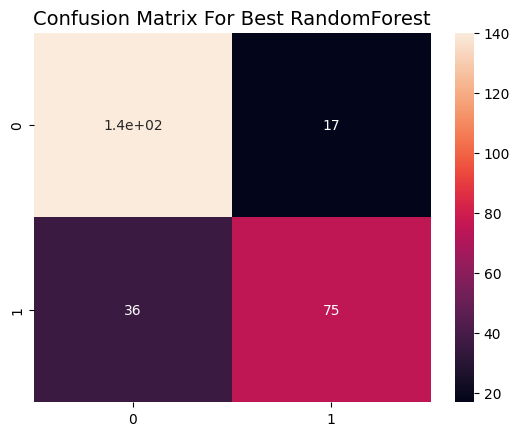

In [ ]:
rf_grid_y_pred = Best_RandomForest_Model.predict(x_test)
conf_matrix = confusion_matrix(y_test, rf_grid_y_pred)
sns.heatmap(conf_matrix, annot=True)
plt.title("Confusion Matrix For Best RandomForest", fontsize=14)